# Pymaceuticals Inc.
---

### Analysis

- The Study:

This analysis is for a new pharmaceutical company called Pymaceuticals. The task was to analyze data from a recent animal screening. In particular, potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer, were administered on mice and observed over a 45-day period. Tumor volume was a key observation point.

The purpose of this screening was to compare the performance of Capomulin, the company’s drug of interest, against other treatment regimens. For this reason, data of Capomulin was pulled out and observed with a bit more detail.

In this study, 249 mice were treated and observed and 10 different drug regimens were administered. There were close to the same number of males and females in this application. One of the mice was eliminated in the analysis because of mismatching data.

- Observations and Analysis:

Over the course of the 45-day study, Ramicane and Capomulin showed the lowest average tumor volume as well as the lowest variance/stdev of the ten drugs studied. These two regimens also administered the highest overall timepoints. Both Ramicane and Capomulin had low SEM, indicating a high reliability of the test.The statistical analysis shows a strong showing for Capomulin.

When observing the data of one random mouse under the treatment of Capomulin, it showed the tumor increasing, initially, and then dropping significantly. At the timepoint of 25 days, the tumor volume began an increasing trend at approximately the initial slope. This suggests the treatment having a strong impact on the tumor after an initial period of time, and then having decreasing effectiveness after a certain period.

There was a strong positive relationship between the average weight and average tumor volume of the mice under the Capomulin treatment. The coefficient of correlation was 0.84, which indicates one, or either, of these attributes changes with the other. It also suggests a cause and effect trend that should be analyzed more thoroughly.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(study_results, mouse_metadata)


In [2]:
# Display the data table for preview
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
mice_count = len(mouse_data["Mouse ID"].unique())
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
unique_ids = mouse_data["Mouse ID"].unique()
duplicate_mice = []
for mouse in unique_ids:
    timepoint_list = mouse_data.loc[mouse_data["Mouse ID"] == mouse, ["Timepoint"]]
    timepoint_count = timepoint_list["Timepoint"].count()
    timepoint_unique = len(timepoint_list["Timepoint"].unique())
    if timepoint_count != timepoint_unique:
        duplicate_mice.append(mouse)
duplicate_mice

['g989']

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = pd.DataFrame(mouse_data.loc[mouse_data["Mouse ID"] == duplicate_mice[0]])
duplicate_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = pd.DataFrame(mouse_data.loc[(mouse_data["Mouse ID"] != duplicate_mice[0]),:])
clean_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_mice["Mouse ID"].unique())
mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_median = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_variance = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_sd = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_sem = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_regimen_stats = pd.DataFrame({"Mean Tumor Volume":drug_mean,
                                   "Median Tumor Volume":drug_median,
                                   "Tumor Volume Variance":drug_variance,
                                   "Tumor Volume Std. Dev.":drug_sd,
                                  "Tumor Volume Std. Err.":drug_sem,
                                  })
drug_regimen_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Get a count of drug regimens for report
regimen_count = drug_regimen_stats["Mean Tumor Volume"].count()
regimen_count

10

In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_regimen_st = clean_mice.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':{'mean','median','var','std','sem'}})
drug_regimen_st

Tumor Volume (mm3)                                          
                           mean       sem     median        var       std
Drug Regimen                                                             
Capomulin             40.675741  0.329346  41.557809  24.947764  4.994774
Ceftamin              52.591172  0.469821  51.776157  39.290177  6.268188
Infubinol             52.884795  0.492236  51.820584  43.128684  6.567243
Ketapril              55.235638  0.603860  53.698743  68.553577  8.279709
Naftisol              54.331565  0.596466  52.509285  66.173479  8.134708
Placebo               54.033581  0.581331  52.288934  61.168083  7.821003
Propriva              52.320930  0.544332  50.446266  43.852013  6.622085
Ramicane              40.216745  0.320955  40.673236  23.486704  4.846308
Stelasyn              54.233149  0.573111  52.431737  59.450562  7.710419
Zoniferol             53.236507  0.516398  51.818479  48.533355  6.966589

## Bar and Pie Charts

Text(0.5, 1.0, 'Total Timepoints Per Drug Regimen')

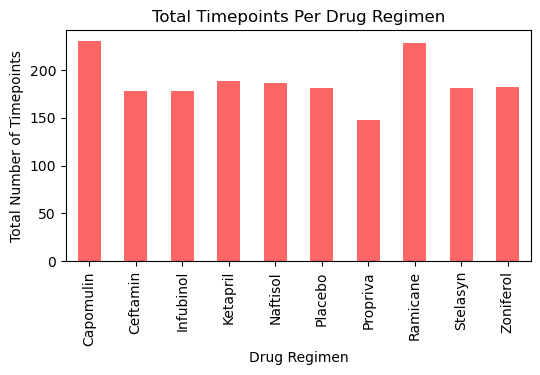

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_timepoint_count = clean_mice.groupby("Drug Regimen")["Timepoint"].count()

regimen_count_chart = regimen_timepoint_count.plot(kind="bar", figsize=(6,3), color="red", alpha=.6)

regimen_count_chart.set_xlabel("Drug Regimen")
regimen_count_chart.set_ylabel("Total Number of Timepoints")
regimen_count_chart.set_title("Total Timepoints Per Drug Regimen")


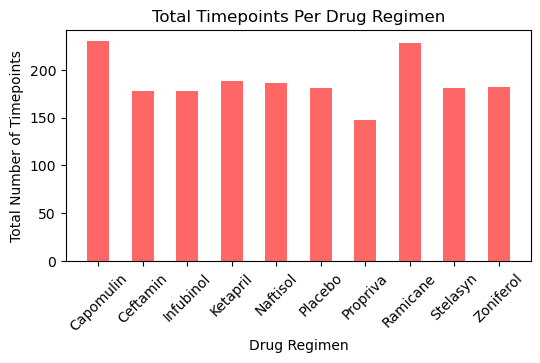

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_list = sorted(clean_mice["Drug Regimen"].unique())
timepoint_count_list = []

for drug in drug_list:
    timepoint_count_list.append((clean_mice.loc[clean_mice["Drug Regimen"] == drug, "Timepoint"]).count())

x_axis = np.arange(len(timepoint_count_list))
    
plt.figure(figsize=(6,3))

plt.bar(drug_list, timepoint_count_list, color = "red", alpha=.6, align="center", width=0.5)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_list, rotation=45)

plt.title("Total Timepoints Per Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.xlabel("Drug Regimen")

plt.show()


<Axes: title={'center': 'Male vs Female Distribution'}>

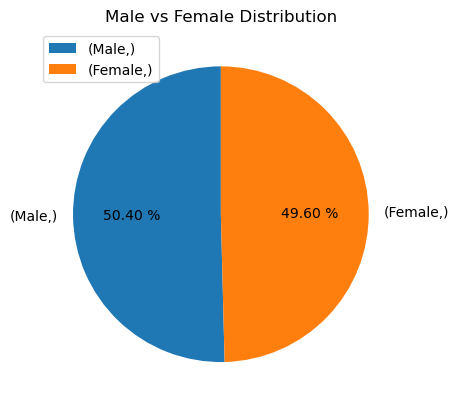

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_df = pd.DataFrame(clean_mice.groupby("Mouse ID")["Sex"].min())

sex_df.value_counts(normalize=True).plot.pie(autopct='%.2f %%', ylabel='', title="Male vs Female Distribution", legend=True, startangle=90)


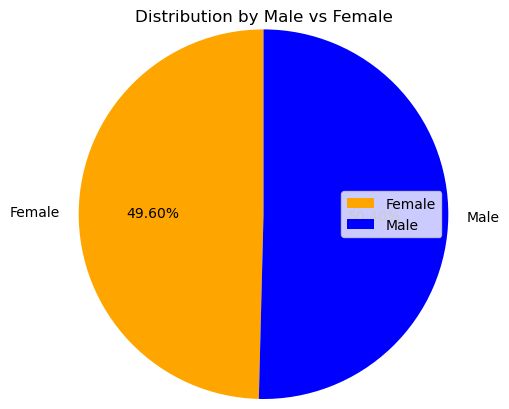

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

female_count = len(sex_df.loc[sex_df["Sex"] == "Female"])
male_count = len(sex_df.loc[sex_df["Sex"] == "Male"])

sex_counts = [female_count, male_count]
sex = ["Female", "Male"]

plt.pie(sex_counts, labels=sex, colors=["orange", "blue"], startangle = 90, autopct = '%1.2f%%') 
plt.legend(sex, loc="best")
plt.title("Distribution by Male vs Female")
plt.axis([-1, 1, -1, 1])
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mice.groupby("Mouse ID")["Timepoint"].max()
last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mice = pd.merge(last_timepoint, clean_mice, how="inner", on="Mouse ID")

clean_timepoint_df = merged_mice.loc[merged_mice["Timepoint_x"] == merged_mice["Timepoint_y"]]

final_timepoint_df = clean_timepoint_df.drop(columns=["Timepoint_y"])
final_timepoint_df = final_timepoint_df.rename(columns={"Timepoint_x":"Timepoint"})
final_timepoint_df = final_timepoint_df.reset_index(drop=True)
final_timepoint_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol" ,"Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_list:   
    mouse_list = []   
    mouse_volumes = final_timepoint_df.loc[final_timepoint_df["Drug Regimen"] == drug]
    mouse_list = mouse_volumes["Tumor Volume (mm3)"].tolist()
   
    # add subset 
    tumor_volume_list.append(mouse_list)
    temp_df = pd.DataFrame({"this drug":mouse_list})
  
    # Determine outliers using upper and lower bounds
    quartiles = temp_df["this drug"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"Results for {drug} :")
    print(f"    The lower quartile of {drug} is: {lowerq}")
    print(f"    The upper quartile of {drug} is: {upperq}")
    print(f"    The interquartile range of {drug} is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"    --Values below {lower_bound} could be outliers of {drug}.")
    print(f"    --Values above {upper_bound} could be outliers of {drug}.")
    
    outlier_list = []
    for mouse in mouse_list:
        if (mouse < lower_bound) | (mouse > upper_bound):
            outlier_list.append(mouse)
        
    if len(outlier_list) > 0:
        print(f"    Potential outliers exist for this regimen with the following volumes:")
        for outlier in outlier_list:
            print(f"    {outlier}")
            print()

        
    else:
        print(f"    This regimen does not have any potential outliers")
        print()


Results for Capomulin :
    The lower quartile of Capomulin is: 32.37735684
    The upper quartile of Capomulin is: 40.1592203
    The interquartile range of Capomulin is: 7.781863460000004
    --Values below 20.70456164999999 could be outliers of Capomulin.
    --Values above 51.83201549 could be outliers of Capomulin.
    This regimen does not have any potential outliers

Results for Ramicane :
    The lower quartile of Ramicane is: 31.56046955
    The upper quartile of Ramicane is: 40.65900627
    The interquartile range of Ramicane is: 9.098536719999998
    --Values below 17.912664470000003 could be outliers of Ramicane.
    --Values above 54.30681135 could be outliers of Ramicane.
    This regimen does not have any potential outliers

Results for Infubinol :
    The lower quartile of Infubinol is: 54.04860769
    The upper quartile of Infubinol is: 65.52574285
    The interquartile range of Infubinol is: 11.477135160000003
    --Values below 36.83290494999999 could be outliers of 

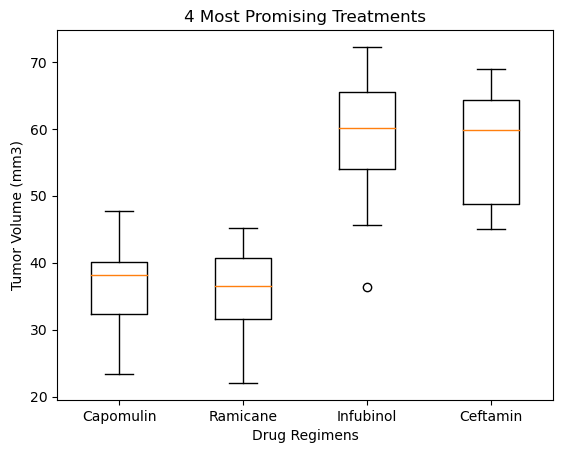

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

multifig, axis1 = plt.subplots()
axis1.boxplot(tumor_volume_list)
axis1.set_xticklabels(treatment_list)
axis1.set_ylabel("Tumor Volume (mm3)")
axis1.set_xlabel("Drug Regimens")
axis1.set_title("4 Most Promising Treatments")


plt.show()

## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_df = clean_mice.loc[clean_mice["Drug Regimen"] == "Capomulin"]
capo_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [19]:
capo_list = capo_df["Mouse ID"].unique()
capo_list

single_capo_df = capo_df.loc[capo_df["Mouse ID"] == "i738"]
single_capo_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1785,i738,0,45.000000,0,Capomulin,Female,23,20
1786,i738,5,45.595685,0,Capomulin,Female,23,20
1787,i738,10,43.421014,0,Capomulin,Female,23,20
1788,i738,15,37.978778,0,Capomulin,Female,23,20
1789,i738,20,38.531136,0,Capomulin,Female,23,20
1790,i738,25,34.973438,0,Capomulin,Female,23,20
1791,i738,30,35.578780,1,Capomulin,Female,23,20
1792,i738,35,36.175953,1,Capomulin,Female,23,20
1793,i738,40,36.843898,2,Capomulin,Female,23,20
1794,i738,45,37.311846,2,Capomulin,Female,23,20


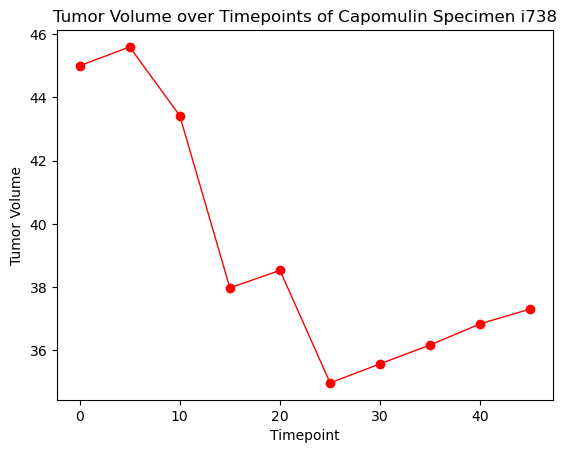

In [20]:
plt.title("Tumor Volume over Timepoints of Capomulin Specimen i738")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

plt.plot(single_capo_df["Timepoint"], single_capo_df["Tumor Volume (mm3)"], linewidth=1, marker='o', color='red')
plt.show()

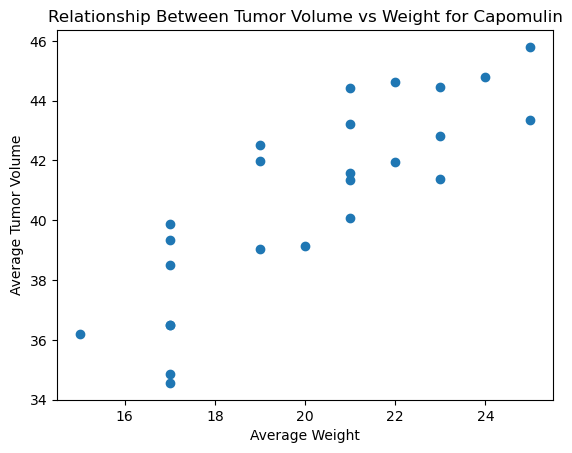

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#per_school_math = school_data_complete.groupby("school_name")["math_score"].mean()
per_mouse_ave_weight = capo_df.groupby("Mouse ID")["Weight (g)"].mean()
per_mouse_ave_volume = capo_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()                                      

capo_scatter_df = pd.DataFrame({"Ave Mouse Weight":per_mouse_ave_weight,
                               "Ave Mouse Tumor Volume":per_mouse_ave_volume})                                       

x_values = per_mouse_ave_weight
y_values = per_mouse_ave_volume
plt.scatter(x_values,y_values)
plt.xlabel('Average Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Relationship Between Tumor Volume vs Weight for Capomulin')
plt.show()


## Correlation and Regression

The correlation coefficient between Weight and Tumor Volume is 0.84


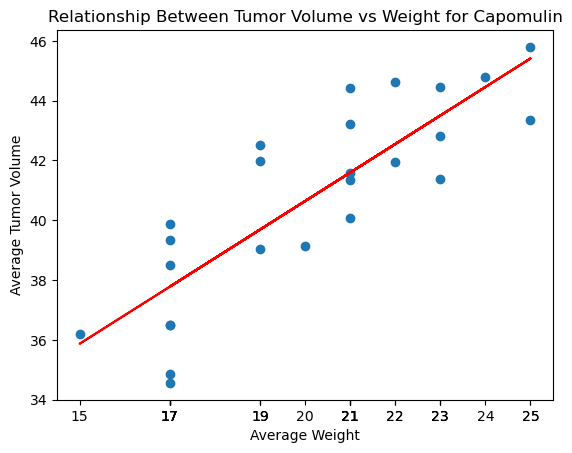

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(capo_scatter_df['Ave Mouse Weight'],capo_scatter_df['Ave Mouse Tumor Volume'])
print(f"The correlation coefficient between Weight and Tumor Volume is {round(st.pearsonr(x_values,y_values)[0],2)}")

p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_values, y_values)
p_fit = p_slope * x_values + p_int
plt.scatter(x_values,y_values)
plt.plot(x_values,p_fit,color="red")
plt.xticks(x_values)
plt.xlabel('Average Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Relationship Between Tumor Volume vs Weight for Capomulin')
plt.show()